In [83]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [84]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"yohanshanuka","key":"e2a9c78b903336207ee006ff6d6563e8"}'}

In [85]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [86]:
!pip install kaggle


In [87]:
!kaggle datasets download -d arjuntejaswi/plant-village


Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
plant-village.zip: Skipping, found more recently modified local copy (use --force to force download)


In [88]:
!rm -rf PlantVillage
!unzip plant-village.zip


Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [89]:
import os

os.makedirs("Tomato_Dataset", exist_ok=True)

In [101]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [91]:
import shutil

source_dir = "PlantVillage"   # change if yours is different
target_dir = "Tomato_Dataset"

for folder in os.listdir(source_dir):
    if folder.startswith("Tomato"):
        shutil.copytree(
            os.path.join(source_dir, folder),
            os.path.join(target_dir, folder),
            dirs_exist_ok=True
        )

print("Tomato dataset created in:", target_dir)

Tomato dataset created in: Tomato_Dataset


In [92]:
import shutil
import os

# Path to your tomato dataset
tomato_dir = "Tomato_Dataset"

# List of folders you want to remove
folders_to_remove = [
    "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "Tomato__Tomato_mosaic_virus"
]

for folder in folders_to_remove:
    folder_path = os.path.join(tomato_dir, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Removed folder: {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")


Folder not found: Tomato_Dataset/Tomato_Septoria_leaf_spot
Folder not found: Tomato_Dataset/Tomato_Spider_mites_Two_spotted_spider_mite
Folder not found: Tomato_Dataset/Tomato__Tomato_YellowLeaf__Curl_Virus
Folder not found: Tomato_Dataset/Tomato__Tomato_mosaic_virus
Removed folder: Tomato_Dataset/Tomato_Septoria_leaf_spot
Removed folder: Tomato_Dataset/Tomato_Spider_mites_Two_spotted_spider_mite
Removed folder: Tomato_Dataset/Tomato__Tomato_YellowLeaf__Curl_Virus
Removed folder: Tomato_Dataset/Tomato__Tomato_mosaic_virus


In [93]:
import os

tomato_dir = "Tomato_Dataset"

for folder in os.listdir(tomato_dir):
    folder_path = os.path.join(tomato_dir, folder)
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        print(f"{folder}: {num_images} images")


Tomato_Bacterial_spot: 2127 images
Tomato_Leaf_Mold: 952 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1909 images
Tomato__Target_Spot: 1404 images
Tomato_healthy: 1591 images


In [94]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Tomato_Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 8983 files belonging to 6 classes.


In [95]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_healthy']

In [96]:
len(dataset)

281

In [97]:
32*281

8992

In [115]:
for img_batch, lbl_batch in dataset.take(1):
  print(img_batch.shape)
  print(lbl_batch.numpy())

(32, 256, 256, 3)
[0 4 5 2 1 4 4 1 2 5 3 1 1 4 2 3 1 5 3 0 4 0 0 0 1 2 0 2 5 4 4 2]


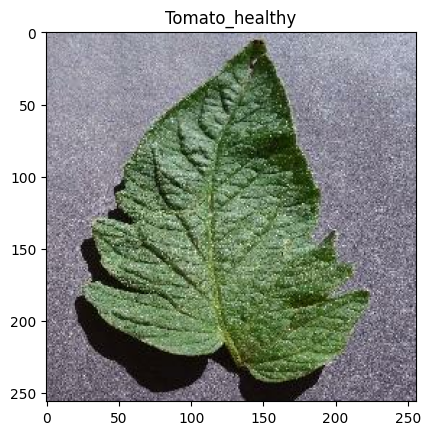

In [116]:
for img_batch, lbl_batch in dataset.take(1):
  plt.imshow(img_batch[0].numpy().astype('uint8'))
  plt.title(class_names[lbl_batch[0]])

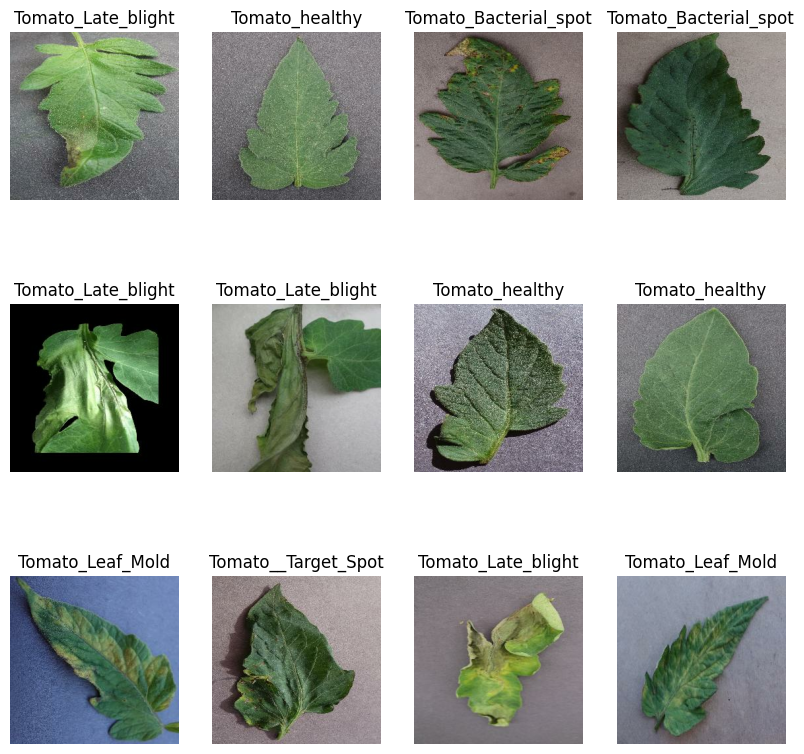

In [118]:
plt.figure(figsize = (10, 10))

for img_batch, lbl_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(img_batch[i].numpy().astype('uint8'))
    plt.title(class_names[lbl_batch[i]])
    plt.axis('off')